### **Boston 주택 가격 예측 모델**

#### 데이터 로드

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import models, layers, utils
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
print(len(train_data))
print(len(test_data))

404
102


#### 데이터 전처리

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#### 모델 구성

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 및 학습

In [6]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

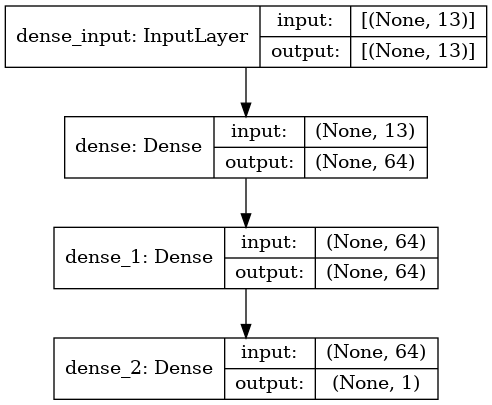

In [7]:
utils.plot_model(model, show_shapes=True)

In [8]:
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(test_data, test_labels))

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 565.2306 - mae: 21.8880 - val_loss: 565.7202 - val_mae: 21.9371
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 507.8468 - mae: 20.5430 - val_loss: 502.0802 - val_mae: 20.4131
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 437.6283 - mae: 18.7022 - val_loss: 416.8362 - val_mae: 18.2071
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 343.9036 - mae: 16.1442 - val_loss: 308.9434 - val_mae: 15.4527
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 235.3381 - mae: 12.8550 - val_loss: 193.6826 - val_mae: 11.9096
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 132.7091 - mae: 9.2205 - val_loss: 108.5262 - val_mae: 8.6659
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 72.7117 - mae: 6.5764 - val_loss: 71.6013 - val_mae: 6.4767
Epoch 8/100
13/13 [===========================

13/13 [==============================] - 0s 4ms/step - loss: 8.3043 - mae: 2.0796 - val_loss: 24.1712 - val_mae: 3.0959
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 8.2504 - mae: 2.0525 - val_loss: 23.4886 - val_mae: 3.0546
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 8.2214 - mae: 2.0654 - val_loss: 23.7504 - val_mae: 3.0719
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 8.1776 - mae: 2.0446 - val_loss: 23.4790 - val_mae: 3.0516
Epoch 66/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0714 - mae: 2.0510 - val_loss: 24.2042 - val_mae: 3.0791
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0940 - mae: 2.0441 - val_loss: 23.6326 - val_mae: 3.0439
Epoch 68/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0565 - mae: 2.0513 - val_loss: 23.8998 - val_mae: 3.0784
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0167 -

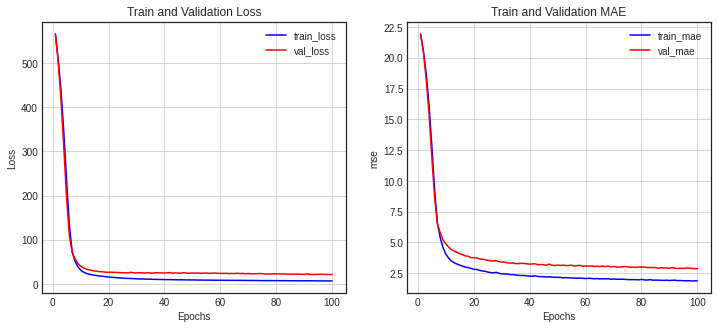

In [9]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('mse')
ax2.grid()
ax2.legend()

plt.show()

#### 모델 평가 및 예측

In [10]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.3688 - mae: 2.8677


[21.368810653686523, 2.867746591567993]

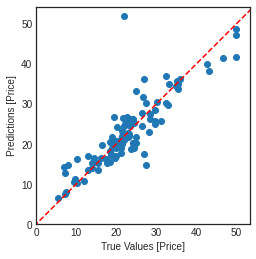

In [11]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100],'r--')

### **Reuters 딥러닝 모델**

#### 데이터 로드 및 전처리

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [13]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size=0.25,
                                                                  random_state=42)
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [14]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1
    return results

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

[0. 1. 0. ... 0. 0. 0.]


#### 모델 구성 및 컴파일

In [15]:
import tensorflow.keras.backend as K

K.clear_session()

In [16]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0

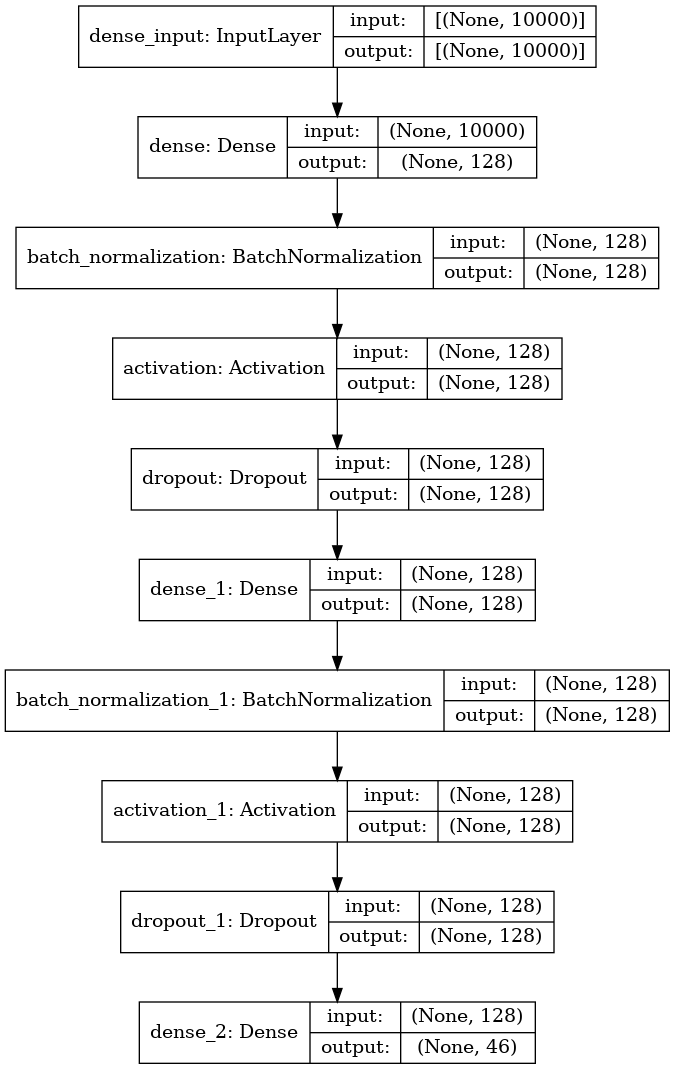

In [18]:
utils.plot_model(model, show_shapes=True)

#### 모델 학습

In [19]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 함수 정의
check_point_cb = ModelCheckpoint('reuters_model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 2s 7ms/step - loss: 2.0156 - accuracy: 0.5371 - val_loss: 1.7536 - val_accuracy: 0.6897
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 1.3604 - accuracy: 0.6856 - val_loss: 1.1814 - val_accuracy: 0.7458
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 1.1173 - accuracy: 0.7374 - val_loss: 1.0778 - val_accuracy: 0.7694
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.9350 - accuracy: 0.7738 - val_loss: 1.0220 - val_accuracy: 0.7854
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.8174 - accuracy: 0.7993 - val_loss: 0.9700 - val_accuracy: 0.7939
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7416 - accuracy: 0.8241 - val_loss: 0.9499 - val_accuracy: 0.8050
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.6692 - accuracy: 0.8319 - val_loss: 0.9289 - val_accuracy: 0.8126
Epoch 

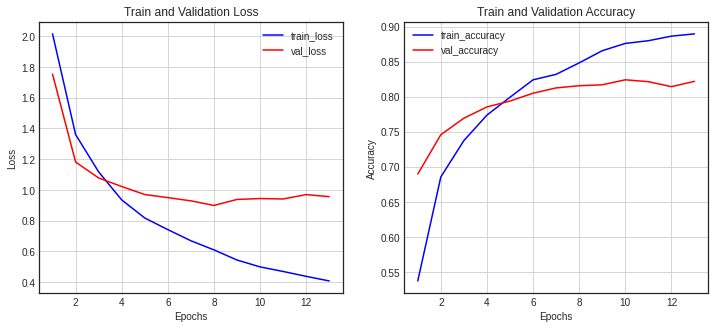

In [20]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [21]:
# print(history.history.keys())

#### 모델 평가 및 예측

In [22]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.7858


[0.9721277356147766, 0.7858415246009827]

### **CIFAR10 딥러닝 모델**

#### 데이터 로드 및 전처리

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import callbacks
from tensorflow.keras import utils

In [24]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [25]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

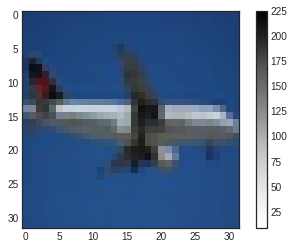

In [26]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [27]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [28]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [29]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [30]:
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
y_test = utils.to_categorical(y_test, 10)

#### 모델 구성 및 컴파일

In [31]:
K.clear_session()

In [32]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(2048, input_shape=(32 * 32 * 3, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

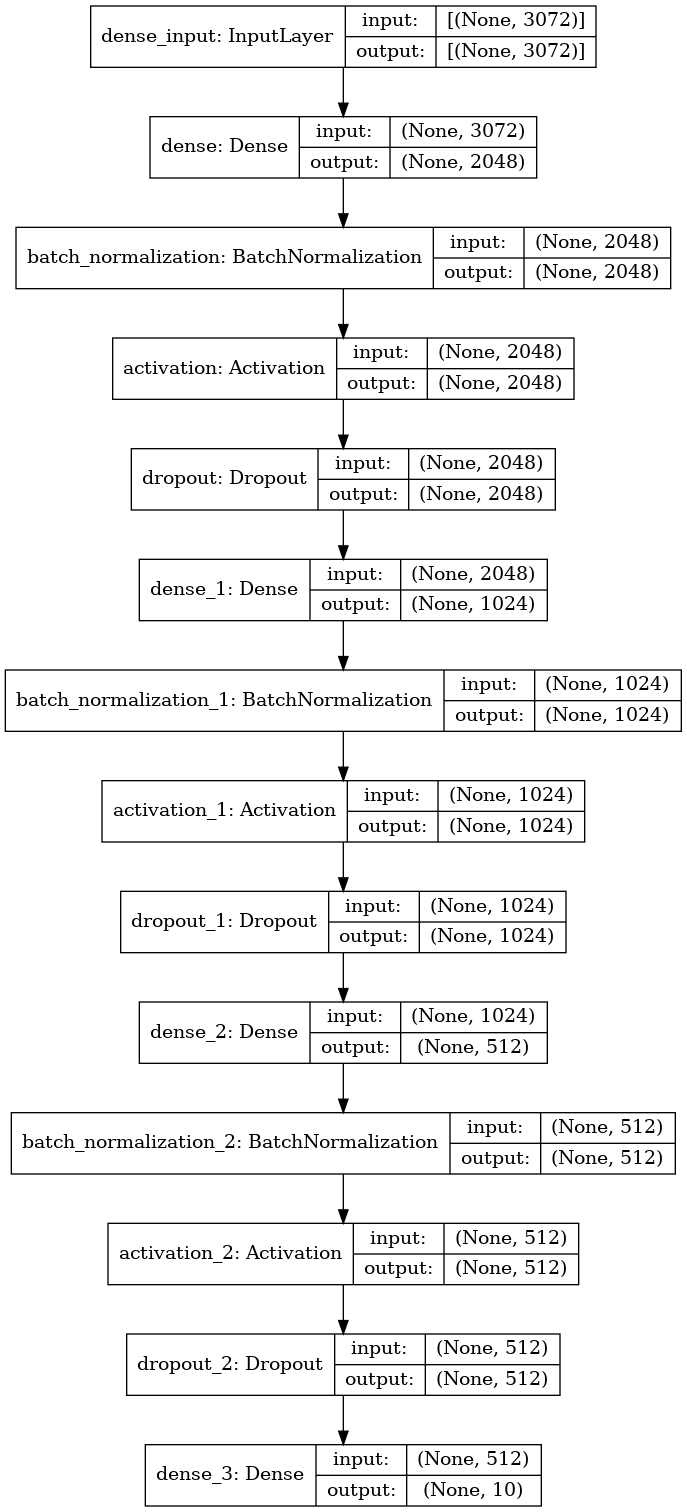

In [34]:
utils.plot_model(model, show_shapes=True)

#### 모델 학습

In [35]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# ModelCheckpoint 콜백 함수 설정                           
check_point_cb = ModelCheckpoint('cifar10_best_model.h5',
                                save_best_only=True)

# EarlyStopping 콜백 함수 설정
early_stopping_cb = EarlyStopping(patience=15,
                                  monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,epochs=100,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

# # 모델 컴파일
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 모델 학습
# history = model.fit(x_train, y_train, 
#                     validation_data=(x_val, y_val), 
#                     epochs=50, 
#                     batch_size=128, 
#                     callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 1.9723 - accuracy: 0.3162 - val_loss: 1.8536 - val_accuracy: 0.3310
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6426 - accuracy: 0.4101 - val_loss: 1.7490 - val_accuracy: 0.3649
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5526 - accuracy: 0.4424 - val_loss: 1.6181 - val_accuracy: 0.4182
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4950 - accuracy: 0.4645 - val_loss: 1.6135 - val_accuracy: 0.4180
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4554 - accuracy: 0.4790 - val_loss: 1.7337 - val_accuracy: 0.3816
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4130 - accuracy: 0.4948 - val_loss: 1.6663 - val_accuracy: 0.3954
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.3838 - accuracy: 0.5053 - val_loss: 1.5561 - val_accuracy: 0.4502

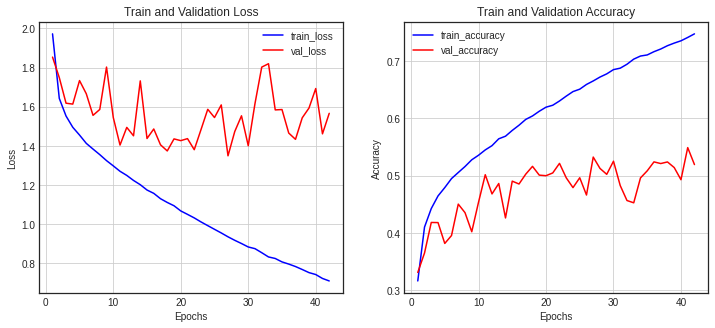

In [36]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 모델 평가 및 예측

In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3560 - accuracy: 0.5290


[1.3559675216674805, 0.5289999842643738]

### **회고**

이번 프로젝트는 데이터 전처리, 모델 구성, 모델 학습 순으로 총 세 가지 모델을 구성해 보았다.
마지막 CIFAR10에서 accuracy가 낮아서 patience 하이퍼파라미터랑 배치 크기, 에폭을 늘려 도보고 줄여도 봤는데 정확도가 높게 나오면 시각화가 이상해서 혼란스러웠다. 여러 시도를 해볼 수 있어서 큰 부담이 없는 프로젝트였다.
새로 알게 된 사실은 val_loss 값이 과대 적합으로 시각화했을 때 매우 변동이 심한 그래프로 나타나서 배치 크기나 학습률을 조절하여 완화할 수 있었지만, train마저 변경되어 최종적으로 52로 제출하게 되었다. 아무래도 노드에서 말한 거처럼 이미지 데이터는 Dense Layer로만 활용하는 데는 한계가 있어서 CNN 모델로 사용해 보는 그날이 곧 오기에 기대가 된다.^^